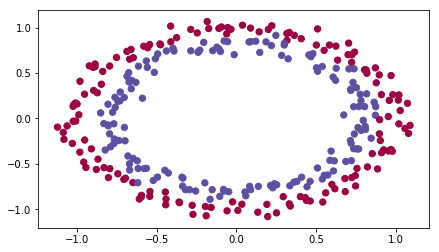

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import *

%matplotlib inline
plt.rcParams["figure.figsize"] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

train_x, train_y, test_x, test_y = load_dataset()

In [2]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]

 
    
    if initialization == 'zero':
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == 'random':
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == 'he':
        parameters = initialize_parameters_he(layers_dims)
    
    for i in range(0, num_iterations):
        a3, cache = forward_propagation(X, parameters)
        
        cost = compute_loss(a3, Y)
        
        grads = backward_propagation(X, Y, cache)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration{}:{}".format(i, cost))
            costs.append(cost)
            
    plt.plot(costs)
    plt.xlabel('iterations(per hunderds)')
    plt.ylabel('cost')
    plt.title('Learning rate = '+ str(learning_rate))
    plt.show()
    
    return parameters

In [3]:
def initialize_parameters_zeros(layers_dims):
    
    parameters = {}
    L = len(layers_dims)
    for l in range(1, L):
        parameters['W'+str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
    return parameters

Cost after iteration0:0.6931471805599453
Cost after iteration1000:0.6931471805599453
Cost after iteration2000:0.6931471805599453
Cost after iteration3000:0.6931471805599453
Cost after iteration4000:0.6931471805599453
Cost after iteration5000:0.6931471805599453
Cost after iteration6000:0.6931471805599453
Cost after iteration7000:0.6931471805599453
Cost after iteration8000:0.6931471805599453
Cost after iteration9000:0.6931471805599453
Cost after iteration10000:0.6931471805599455
Cost after iteration11000:0.6931471805599453
Cost after iteration12000:0.6931471805599453
Cost after iteration13000:0.6931471805599453
Cost after iteration14000:0.6931471805599453


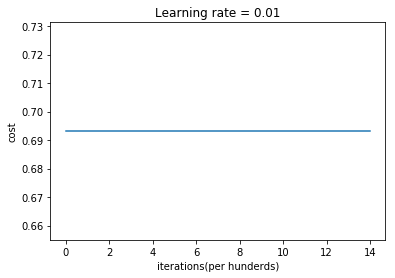

On the train strat
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [4]:
parameters = model(train_x, train_y, initialization = 'zero')
print("On the train strat")
prediction_train = predict(train_x, train_y, parameters)
print("On the test set:")
prediction_test = predict(test_x, test_y, parameters)

In [5]:
print("predictions_train =" + str(prediction_train))
print("predictions_test =" + str(prediction_test))

predictions_train =[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test =[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


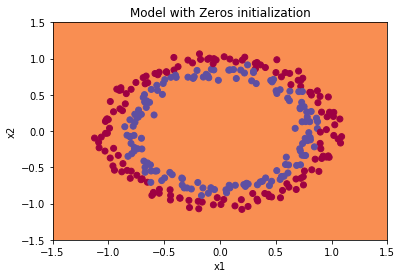

In [6]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_x, train_y)

In [7]:
def initialize_parameters_random(layers_dims):
    parameters = {}
    L = len(layers_dims)
    np.random.seed(3)
    
    for l in range(1, L):
        parameters['W'+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*10
        parameters['b'+str(l)] = np.zeros((layers_dims[l], 1))
    
        
    return parameters

In [8]:
parameters = initialize_parameters_random([3,2,1])
parameters

{'W1': array([[ 17.88628473,   4.36509851,   0.96497468],
        [-18.63492703,  -2.77388203,  -3.54758979]]), 'b1': array([[0.],
        [0.]]), 'W2': array([[-0.82741481, -6.27000677]]), 'b2': array([[0.]])}

C:\Users\chen\Desktop\DeepLearning\Improving Deep Neural Network\week1\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\chen\Desktop\DeepLearning\Improving Deep Neural Network\week1\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration0:inf
Cost after iteration1000:0.6235719528716395
Cost after iteration2000:0.5980821226022246
Cost after iteration3000:0.5637996692567824
Cost after iteration4000:0.5501754102867465
Cost after iteration5000:0.5444767640123352
Cost after iteration6000:0.5374657035647926
Cost after iteration7000:0.4775406670630984
Cost after iteration8000:0.39784053325714386
Cost after iteration9000:0.3934817369887478
Cost after iteration10000:0.39203280921110983
Cost after iteration11000:0.38927347547167324
Cost after iteration12000:0.3861625886188003
Cost after iteration13000:0.38499044850062425
Cost after iteration14000:0.38279756848782404


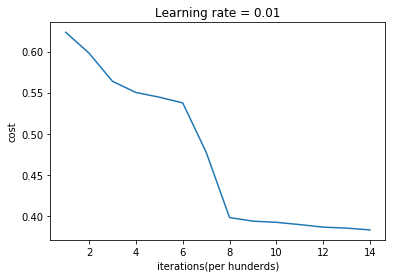

on the train set
Accuracy: 0.83
on the train set:
Accuracy: 0.86


In [9]:
parameters = model(train_x, train_y, initialization = 'random')
print("on the train set")
predictions_train = predict(train_x, train_y, parameters)
print("on the train set:")
predictions_test = predict(test_x, test_y, parameters)

In [10]:
print(predictions_train)
print(predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


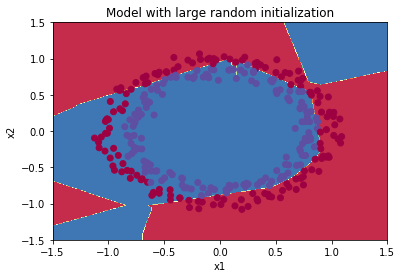

In [11]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_x, train_y)

In [15]:
def initialize_parameters_he(layers_dims):
    parameters = {}
    L = len(layers_dims)
    np.random.seed(3)
    
    for l in range(1, L):
        parameters['W'+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*np.sqrt(2./layers_dims[l-1])
        parameters['b'+str(l)] = np.zeros((layers_dims[l], 1))
    
        
    return parameters

In [16]:
parameters = initialize_parameters_he([2,4,1])
parameters

{'W1': array([[ 1.78862847,  0.43650985],
        [ 0.09649747, -1.8634927 ],
        [-0.2773882 , -0.35475898],
        [-0.08274148, -0.62700068]]), 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]), 'W2': array([[-0.03098412, -0.33744411, -0.92904268,  0.62552248]]), 'b2': array([[0.]])}

Cost after iteration0:0.8830537463419761
Cost after iteration1000:0.6879825919728063
Cost after iteration2000:0.6751286264523371
Cost after iteration3000:0.6526117768893807
Cost after iteration4000:0.6082958970572938
Cost after iteration5000:0.5304944491717495
Cost after iteration6000:0.4138645817071795
Cost after iteration7000:0.31178034648444414
Cost after iteration8000:0.23696215330322565
Cost after iteration9000:0.18597287209206842
Cost after iteration10000:0.15015556280371808
Cost after iteration11000:0.12325079292273552
Cost after iteration12000:0.09917746546525931
Cost after iteration13000:0.08457055954024274
Cost after iteration14000:0.07357895962677365


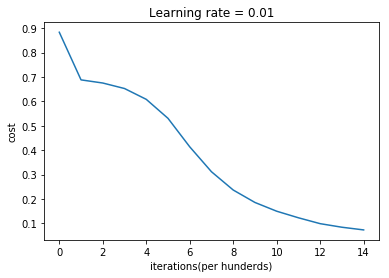

on the train set
Accuracy: 0.9933333333333333
on the train set:
Accuracy: 0.96


In [17]:
parameters = model(train_x, train_y, initialization = 'he')
print("on the train set")
predictions_train = predict(train_x, train_y, parameters)
print("on the train set:")
predictions_test = predict(test_x, test_y, parameters)

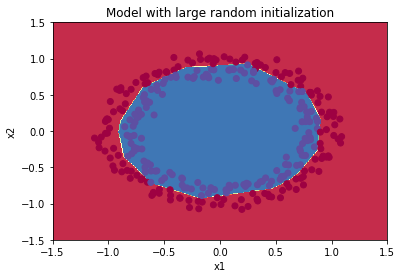

In [18]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_x, train_y)